In [52]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from my_functions import initial_analysis
from my_functions import create_plot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


# Initial Analysis with Pandas

In [3]:
insurancedf = pd.read_csv('TravelInsurancePrediction.csv')

In [6]:
initial_analysis(insurancedf)

(1987, 10)

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
1982,1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1
1986,1986,34,Private Sector/Self Employed,Yes,500000,4,0,No,No,0


Index(['Unnamed: 0', 'Age', 'Employment Type', 'GraduateOrNot', 'AnnualIncome',
       'FamilyMembers', 'ChronicDiseases', 'FrequentFlyer',
       'EverTravelledAbroad', 'TravelInsurance'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


None

Unnamed: 0 contains 1987 unique values
Age contains 11 unique values
Employment Type contains 2 unique values
GraduateOrNot contains 2 unique values
AnnualIncome contains 30 unique values
FamilyMembers contains 8 unique values
ChronicDiseases contains 2 unique values
FrequentFlyer contains 2 unique values
EverTravelledAbroad contains 2 unique values
TravelInsurance contains 2 unique values
The dataframe contains 0 duplicated values


,Unnamed: 0,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,993.000000,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,573.741812,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,0.000000,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,496.500000,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,993.000000,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,1489.500000,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,1986.000000,35.000000,1.800000e+06,9.000000,1.000000,1.000000


The dataset has a total of 10 features, with 6 numerical features and 4 categorical features. There are no duplicates and no null values. 

The only a few things I'd like to do during the cleaning process. Drop the Unnamed:0 column as this is an index column and is not necessary for analysis. Change the data types of the ChronicDiseases and TravelInsurance columns as these are categorical. 

# Data Cleaning

Issues 
- Unnamed:0 column is not needed. 
- ChronicDiseases and TravelInsurance columns are categorical but have numeric data types. 

Solutions 
- Drop column Unnamed:0. 
- Fix data types for ChronicDiseases and TravelInsurance columns. 

In [8]:
insurance_to_clean = insurancedf.copy()

In [9]:
insurance_to_clean.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
insurance_to_clean['ChronicDiseases'] = insurance_to_clean['ChronicDiseases'].astype('object')
insurance_to_clean['TravelInsurance'] = insurance_to_clean['TravelInsurance'].astype('object')

In [11]:
insurance_to_clean.to_csv(r'travel_insurance_clean.csv', index=False, header=True)

In [4]:
travel_insurance_df = pd.read_csv('travel_insurance_clean.csv')

# Outlier Detection

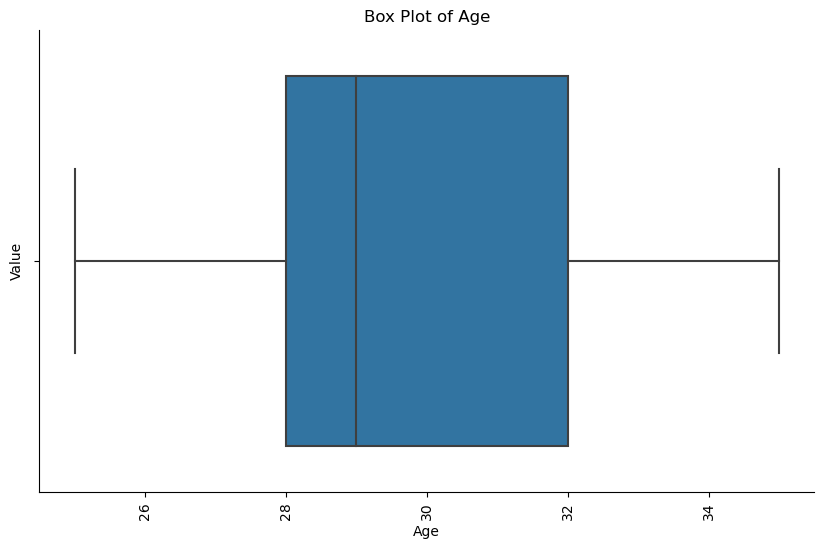

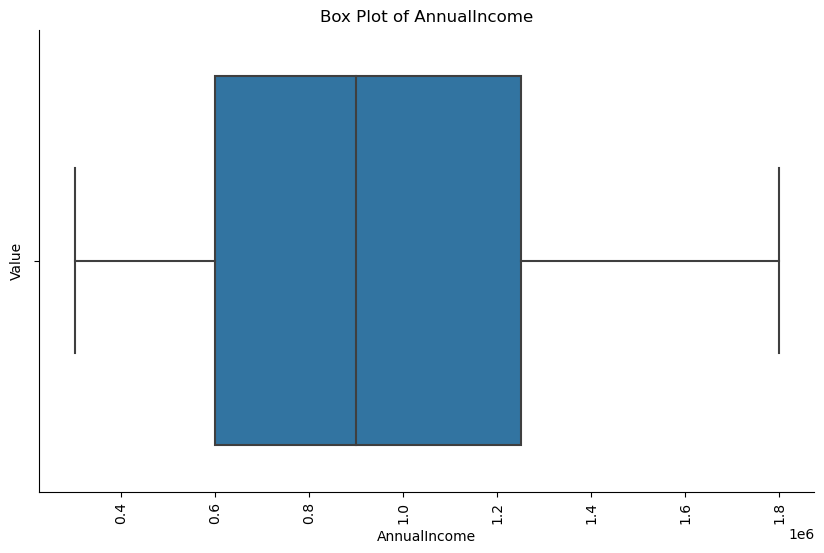

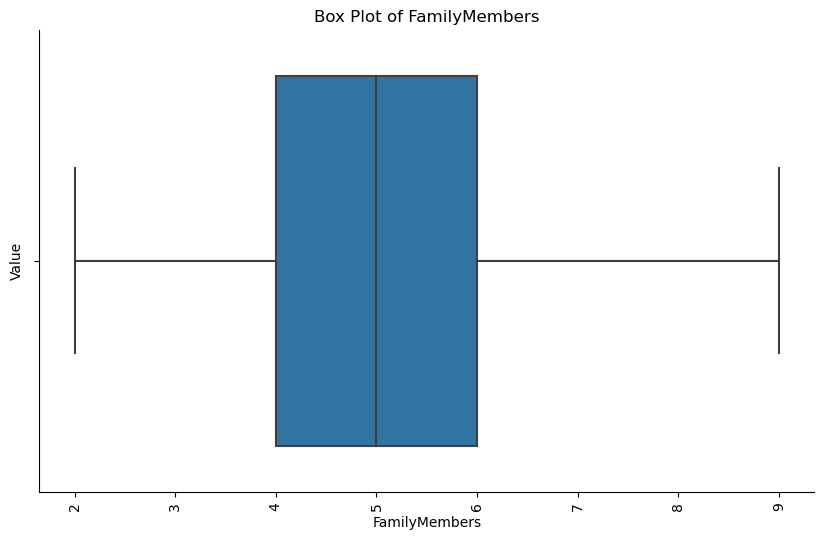

In [15]:
numerical_columns = ['Age', 'AnnualIncome', 'FamilyMembers']

for col in numerical_columns:
    create_plot(travel_insurance_df, col, None, 'box', f'Box Plot of {col}', col, 'Value')

- Age: The box plot for Age indicates a fairly symmetrical distribution with a small number of outliers on the higher end. The age distribution seems to be concentrated around the median with a relatively small interquartile range (IQR), suggesting that most of the insured individuals fall within a specific age group, with a few exceptions.

- AnnualIncome: The AnnualIncome feature shows a significant number of high-value outliers, as indicated by the points above the upper whisker of the box plot. These outliers represent individuals with substantially higher annual incomes compared to the majority of the data points. This could suggest income disparity among the insured individuals or specific high-income individuals opting for travel insurance.

- FamilyMembers: The box plot for FamilyMembers shows a few outliers on the higher end.

> Ultimately, nothing looks super out of the ordinary and we can continue forward. 

# Univariate Analysis

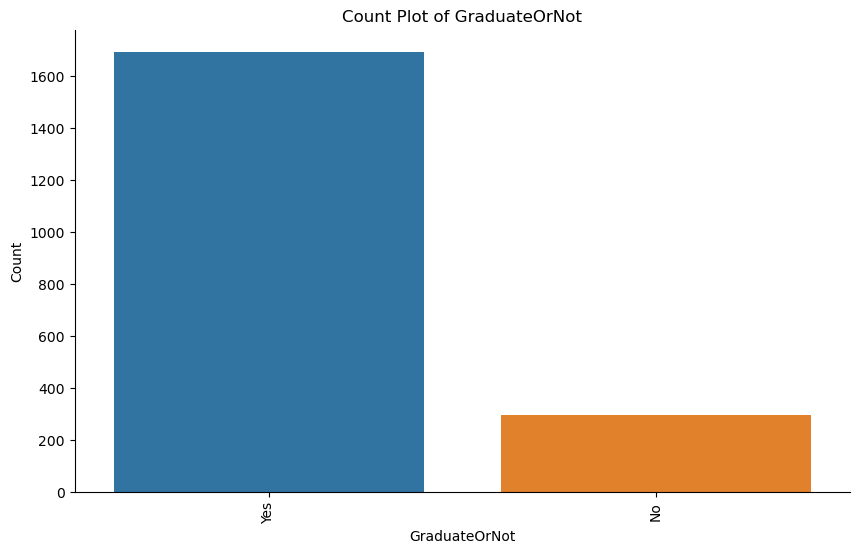

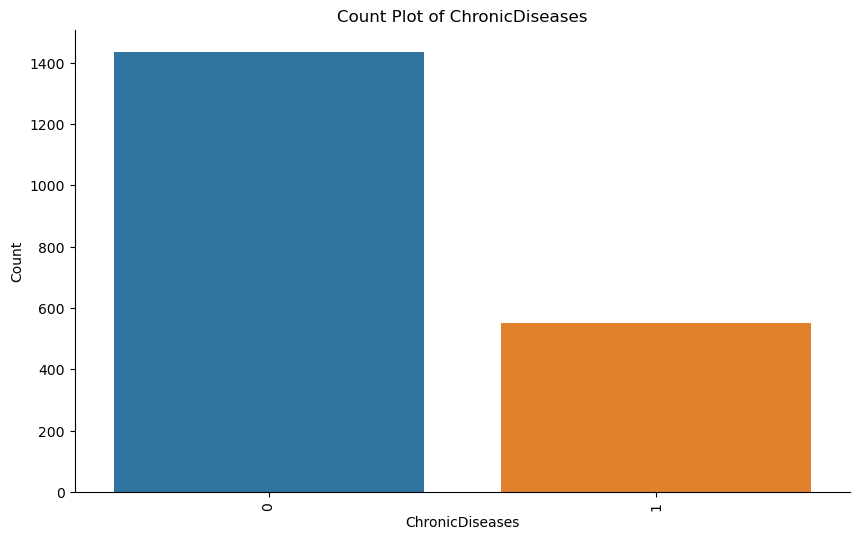

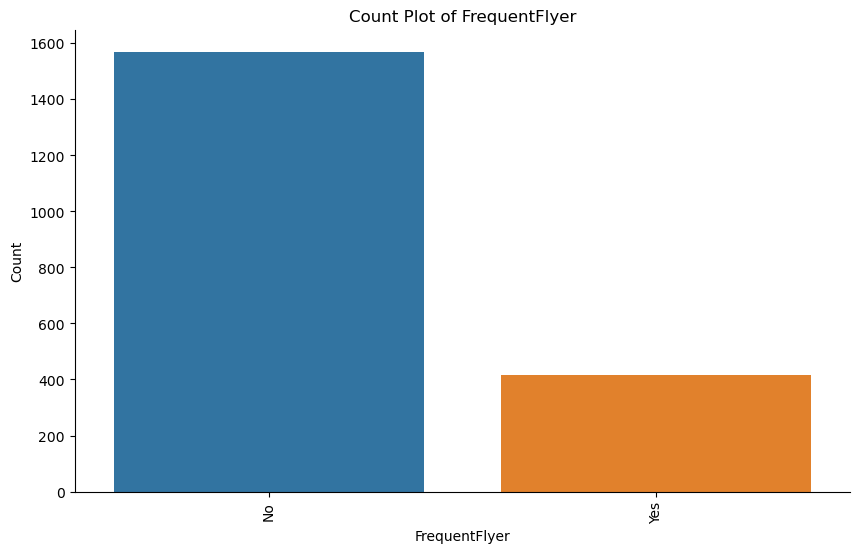

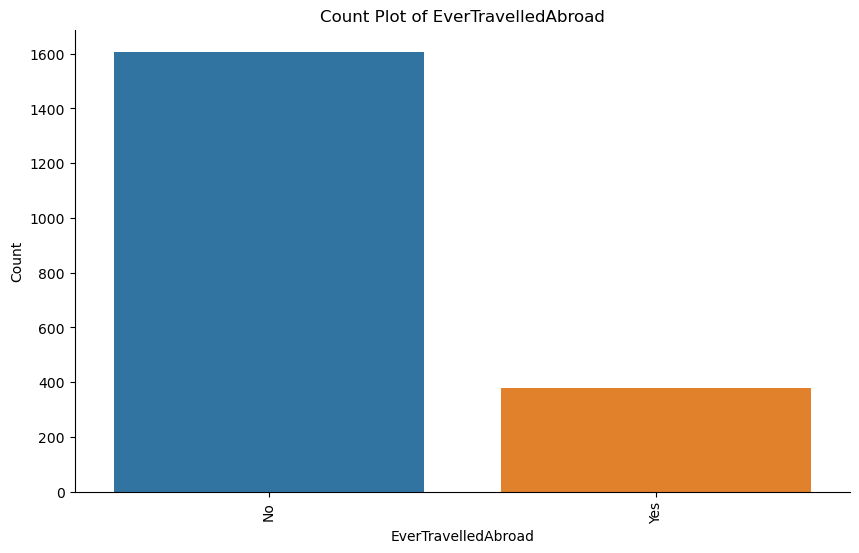

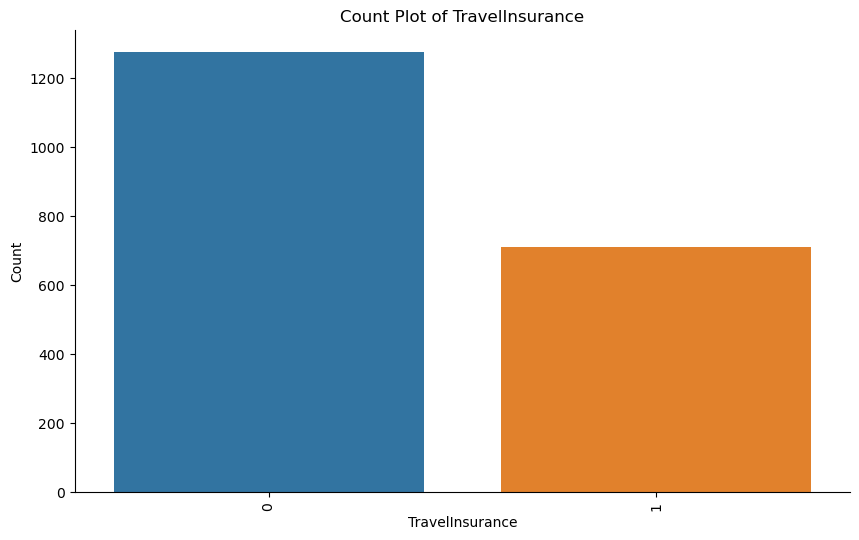

In [16]:
categorical_columns = ['GraduateOrNot', 'ChronicDiseases', 'FrequentFlyer', 'EverTravelledAbroad', 'TravelInsurance']

for col in categorical_columns:
    create_plot(travel_insurance_df, col, None, 'count', f'Count Plot of {col}', col, 'Count')

## Univariate Insights 

- GraduateOrNot: The majority of individuals in the dataset are graduates. This could suggest that the dataset might be skewed towards individuals with higher education.

- ChronicDiseases: A larger portion of the dataset consists of individuals without chronic diseases. 

- FrequentFlyer: The count plot shows that the majority of individuals are not frequent flyers.

- EverTravelledAbroad: Similar to frequent flyers, a significant majority of individuals have never traveled abroad. 

- TravelInsurance: There is a visible difference between the number of individuals who have purchased travel insurance and those who have not, with a larger number opting not to purchase. This distribution could be influenced by various factors, including perceptions of risk, travel habits, and socio-economic status.

# Bivariate Analysis

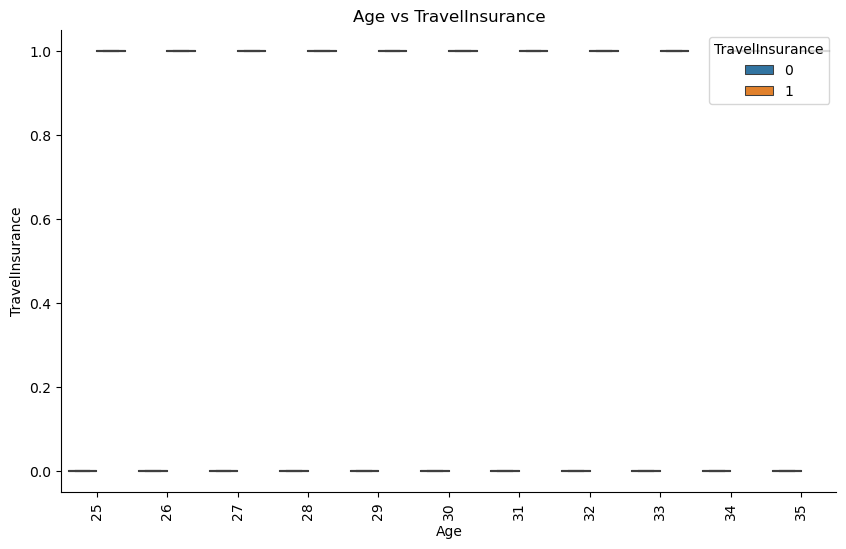

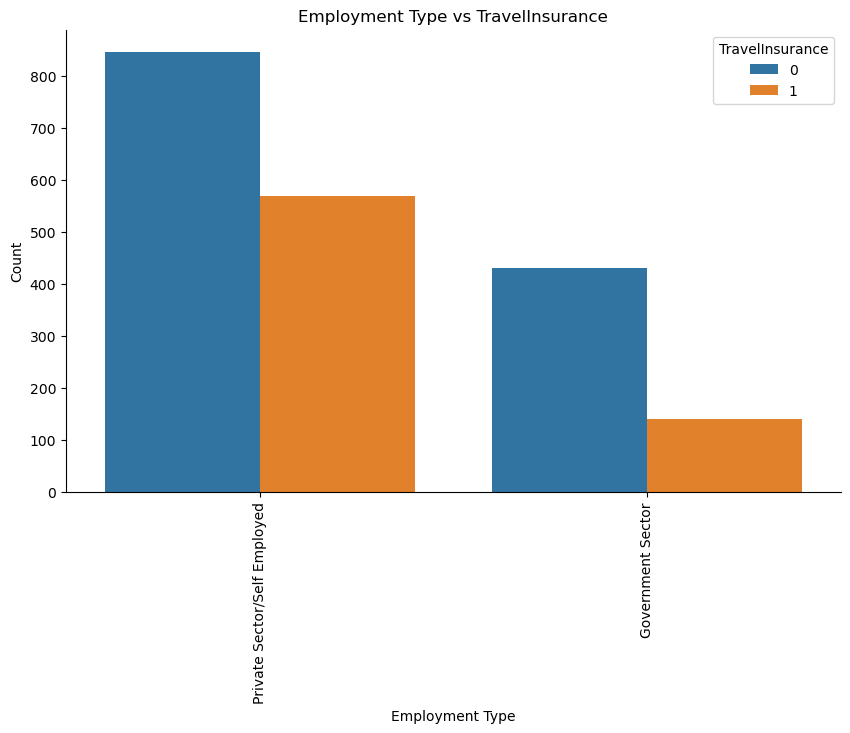

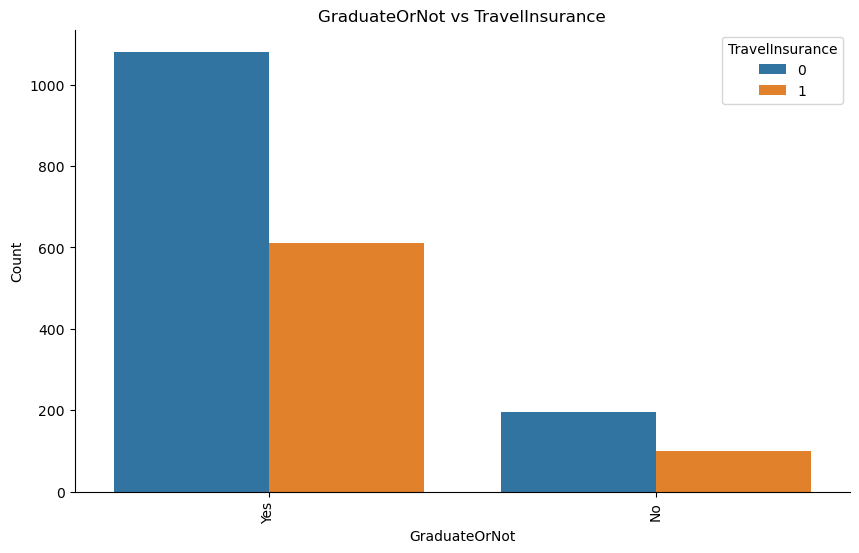

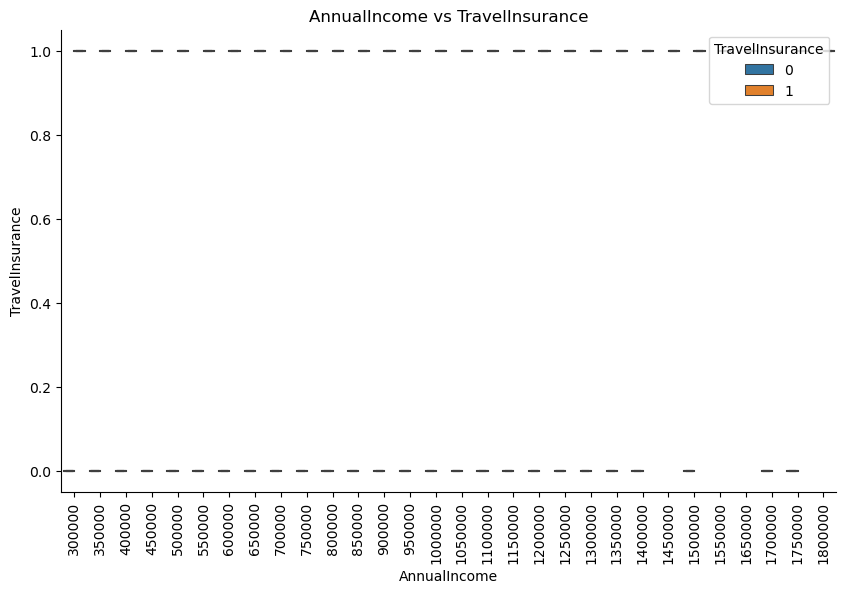

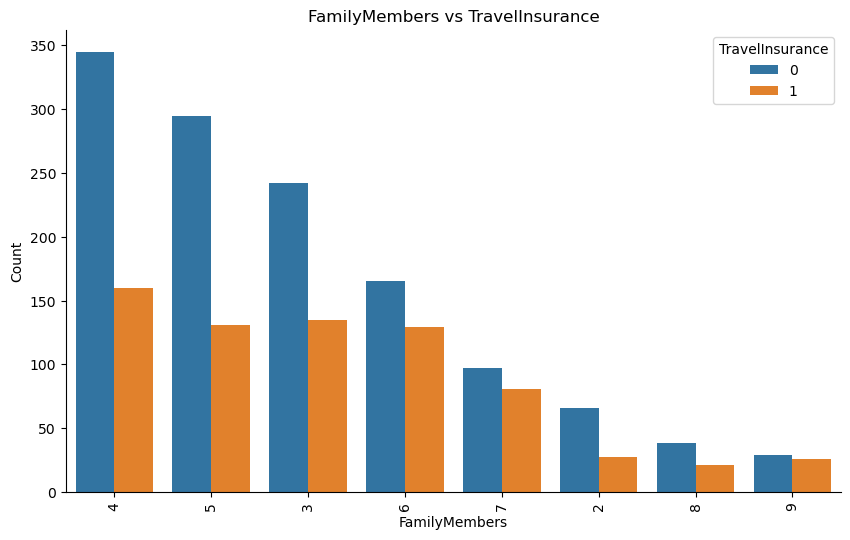

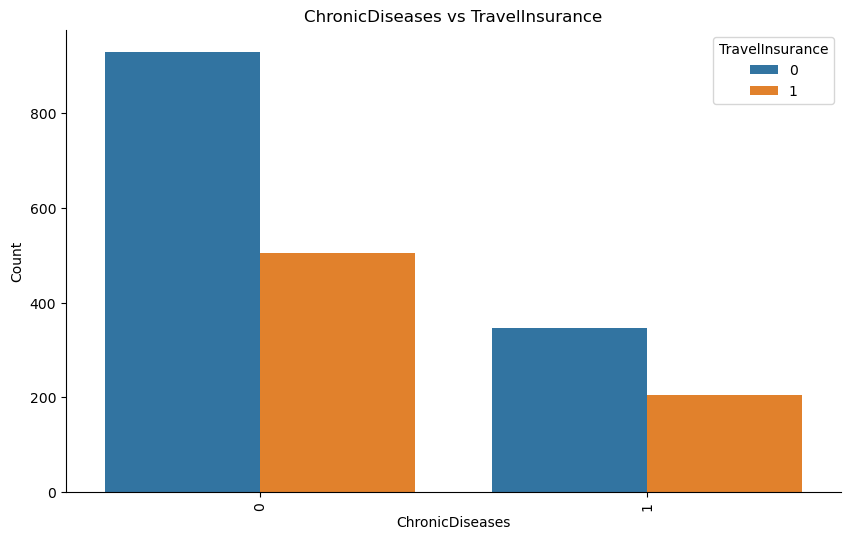

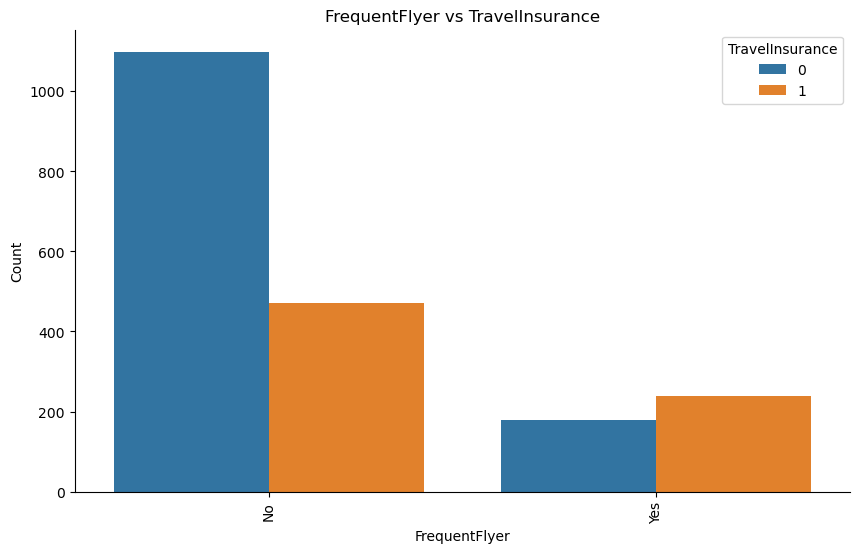

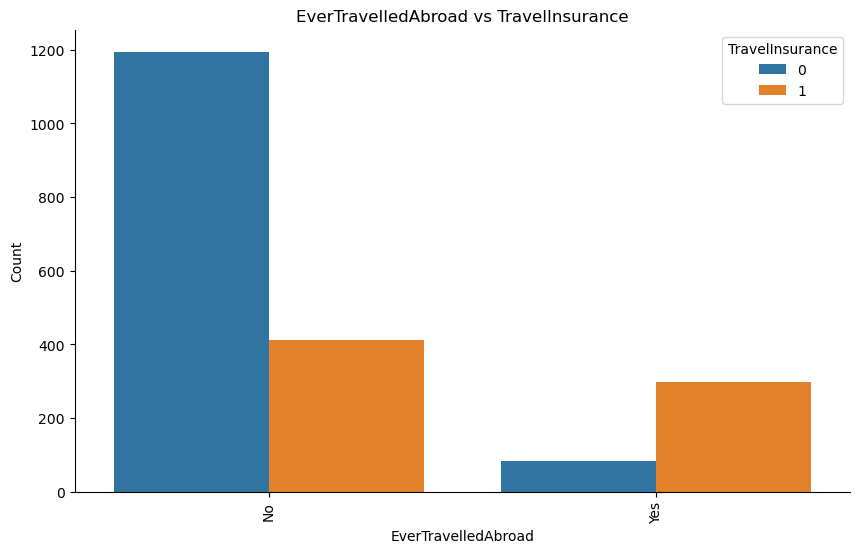

In [20]:
for col in travel_insurance_df.columns:
    if col != 'TravelInsurance':  
        if travel_insurance_df[col].dtype == 'object' or len(travel_insurance_df[col].unique()) < 10:
            create_plot(travel_insurance_df, col, None, 'count', f'{col} vs TravelInsurance', col, 'Count', hue='TravelInsurance')
        else:
            create_plot(travel_insurance_df, col, 'TravelInsurance', 'box', f'{col} vs TravelInsurance', col, 'TravelInsurance', hue='TravelInsurance')

I'll revist Age and AnnualIncome because these plots don't tell me enough information.

Employment Type: The count plots indicate that individuals employed in the private sector or self-employed are more likely to purchase travel insurance compared to those in the government sector.

GraduateOrNot: There doesn't appear to be a significant difference in the purchase of travel insurance between graduates and non-graduates, suggesting that education level might not be a strong predictor for purchasing travel insurance in this dataset.

FamilyMembers: The box plots show a slight variation in family size between those who have and haven't purchased travel insurance, but the difference does not appear to be substantial.

ChronicDiseases: The count plots show that the presence of chronic diseases doesn't significantly affect the purchase of travel insurance, as the distribution seems relatively similar between those who have and haven't purchased insurance.

FrequentFlyer: The count plots reveal that frequent flyers are more likely to purchase travel insurance compared to those who are not frequent flyers, which aligns with the expectation that frequent travelers would have a higher tendency to insure their trips.

EverTravelledAbroad: There is a notable difference in the purchase of travel insurance between individuals who have and haven't traveled abroad. Those who have traveled abroad are much more likely to purchase travel insurance, suggesting that international travel experience influences the decision to buy travel insurance.

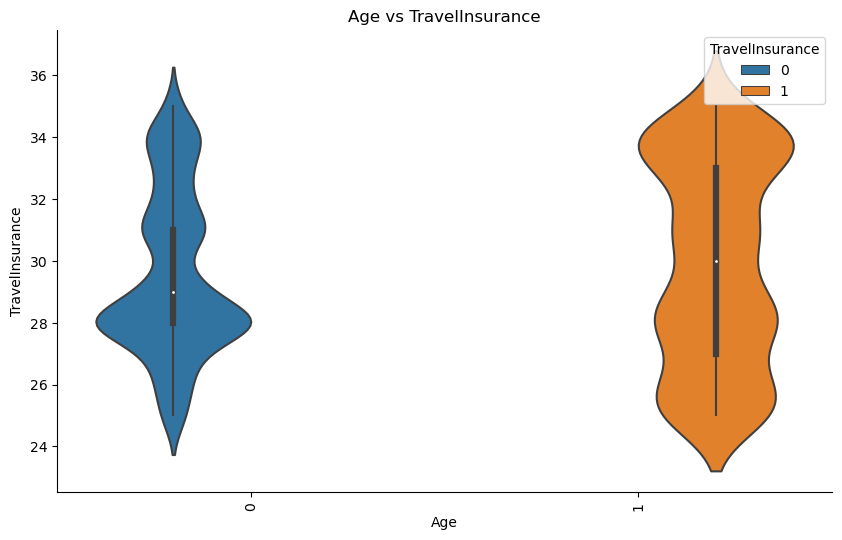

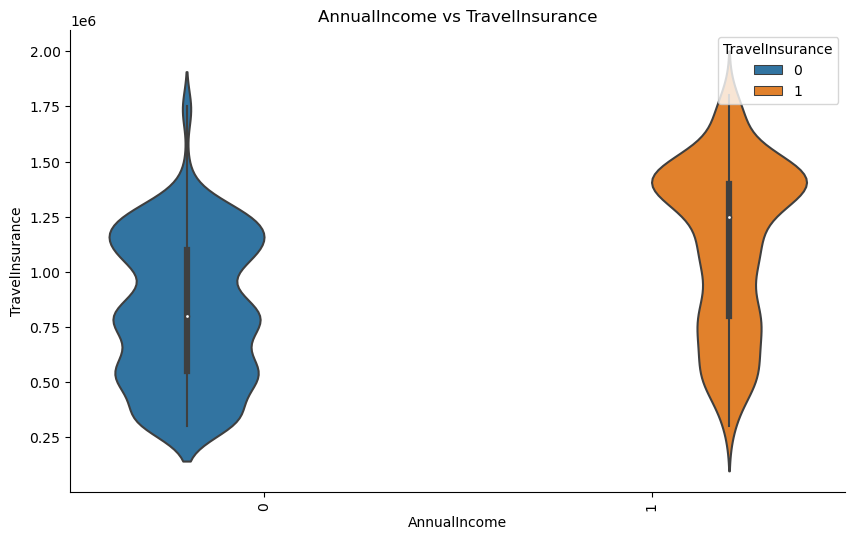

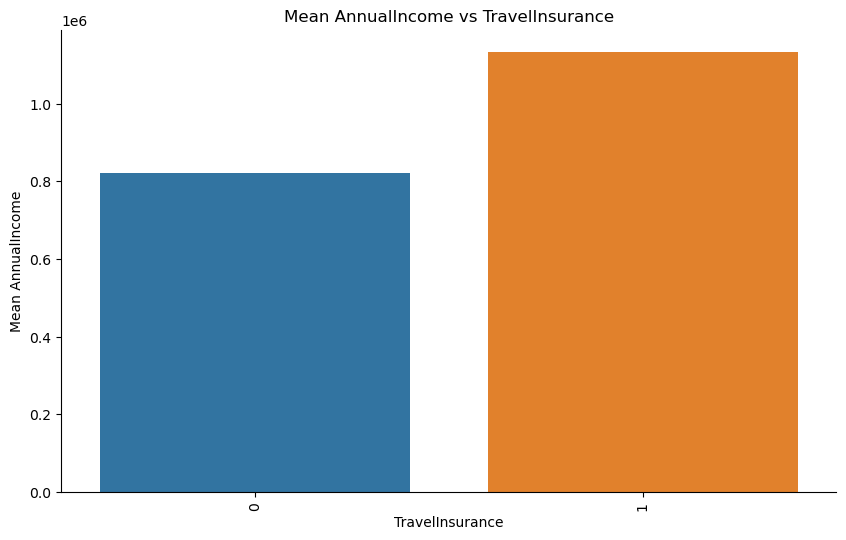

In [14]:
create_plot(travel_insurance_df, 'TravelInsurance', 'Age', 'violin', 'Age vs TravelInsurance', 'Age', 'TravelInsurance', hue='TravelInsurance')
create_plot(travel_insurance_df, 'TravelInsurance', 'AnnualIncome', 'violin', 'AnnualIncome vs TravelInsurance', 'AnnualIncome', 'TravelInsurance', hue='TravelInsurance')

travel_insurance_df.groupby('TravelInsurance')['AnnualIncome'].mean().reset_index().pipe(lambda df: create_plot(df, 'TravelInsurance', 'AnnualIncome', 'bar', 'Mean AnnualIncome vs TravelInsurance', 'TravelInsurance', 'Mean AnnualIncome'))

The violin plots for Age and AnnualIncome against TravelInsurance provide a clearer visualization of the data distribution:

- Age vs TravelInsurance: The violin plot shows that the age distribution for individuals who do not purchase travel insurance is slightly more concentrated around younger ages compared to those who do purchase travel insurance. There's a wider spread and slightly higher median age among those who have travel insurance, suggesting age could be a factor in the decision to purchase travel insurance.

- AnnualIncome vs TravelInsurance: The violin plot reveals that individuals who purchase travel insurance generally have a higher income distribution, with a wider spread and higher median income. This indicates that higher annual income might be associated with a higher likelihood of purchasing travel insurance.

- The bar plot for the mean AnnualIncome against TravelInsurance categories clearly shows that, on average, individuals who purchase travel insurance have a higher annual income compared to those who do not. This further supports the insight from the violin plot, emphasizing the potential influence of income level on the decision to purchase travel insurance.

# Multivariate Analysis

### How does age and annual income together influence the likelihood of purchasing travel insurance?

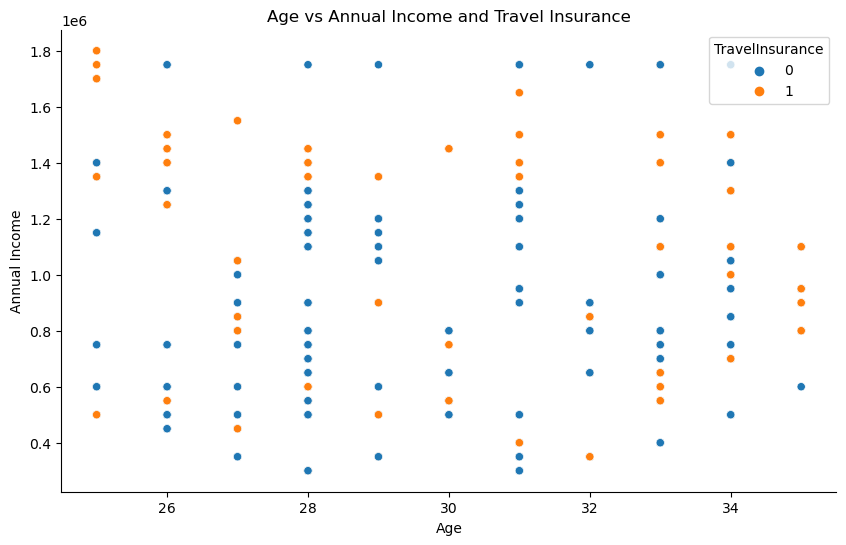

In [17]:
create_plot(travel_insurance_df, 'Age', 'AnnualIncome', 'scatter', 'Age vs Annual Income and Travel Insurance', 'Age', 'Annual Income', 'TravelInsurance')

- Income Threshold for Purchasing Insurance: There appears to be a noticeable trend where individuals with higher annual incomes (represented by points higher on the y-axis) are more likely to have purchased travel insurance (orange points). This suggests that higher income levels may correlate with a greater propensity to buy travel insurance, possibly due to greater financial flexibility or perceived need for security when traveling.

- Age Distribution: The distribution of orange points (indicating insurance purchase) across different age groups is relatively even, suggesting that age, by itself, might not be a strong predictor of travel insurance purchasing behavior. However, there seems to be a slight increase in insurance purchases among middle-aged individuals, indicated by a denser cluster of orange points in the age range of approximately 30-40 years.

- Lower Income Bracket Behavior: In the lower annual income range, there is a mix of blue (not purchased) and orange (purchased) points, but the blue points seem to dominate. This indicates that individuals with lower incomes are less likely to purchase travel insurance, possibly due to budget constraints or different priorities.

### Is there a relationship between employment type, age, and the decision to purchase travel insurance?

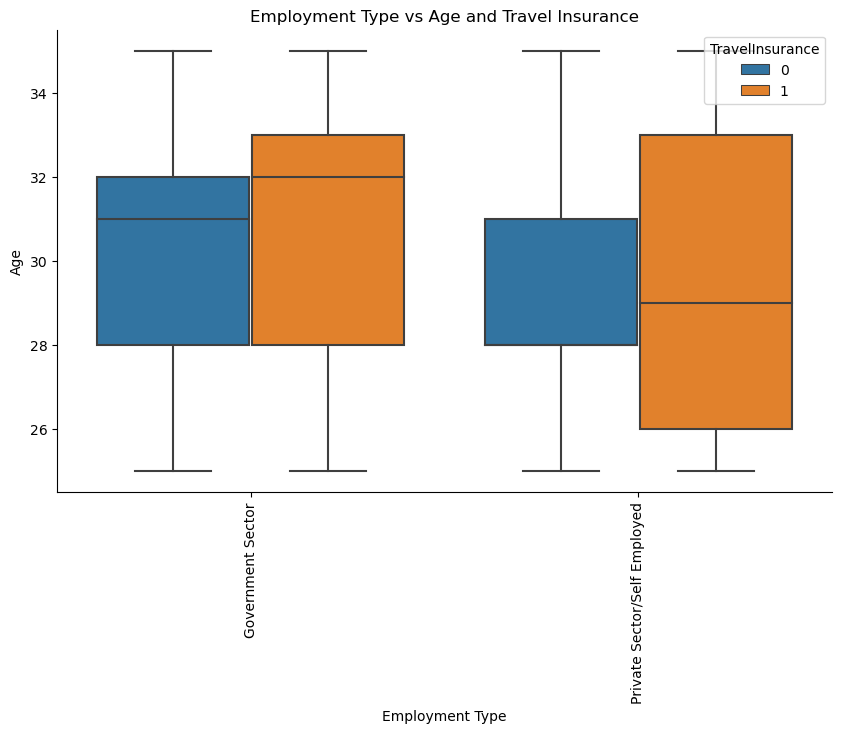

In [18]:
create_plot(travel_insurance_df, 'Employment Type', 'Age', 'box', 'Employment Type vs Age and Travel Insurance', 'Employment Type', 'Age', 'TravelInsurance')

- Employment Type Influence: Both government and private sectors show a mix of blue and orange boxes, indicating that individuals in both sectors purchase travel insurance. However, the proportion of orange (purchased) to blue (not purchased) seems slightly higher in the government sector, suggesting that government employees might have a slightly higher propensity to purchase travel insurance.

- Age Distribution Within Employment Types: The age distribution, as represented by the spread of the boxes, does not show a significant difference between those who purchased and those who did not within each employment type. This indicates that within each employment sector, age might not be a significant factor in the decision to purchase travel insurance.

- Median Age Insights: The median age (indicated by the line within each box) of insurance purchasers and non-purchasers appears to be similar across both employment types, further suggesting that the decision to purchase insurance is not strongly influenced by age within these employment categories.

### How does annual income combined with family size impact the likelihood of purchasing travel insurance?

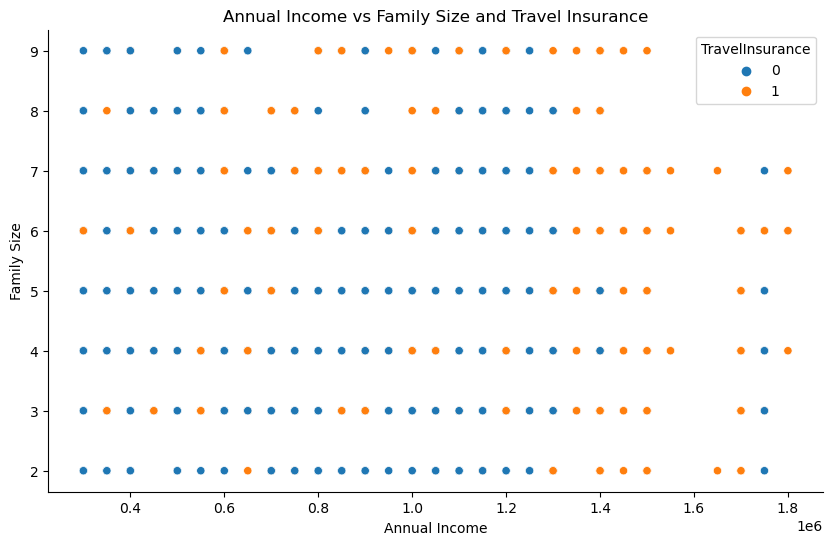

In [21]:
create_plot(travel_insurance_df, 'AnnualIncome', 'FamilyMembers', 'scatter', 'Annual Income vs Family Size and Travel Insurance', 'Annual Income', 'Family Size', 'TravelInsurance')

- Income and Insurance Purchase: There is a noticeable trend where individuals with higher annual incomes (points further to the right on the x-axis) show a higher likelihood of purchasing travel insurance (more orange points). This suggests that financial capability plays a significant role in the decision to purchase travel insurance, with wealthier individuals more likely to invest in it.

- Family Size Consideration: The plot shows a range of family sizes, but there doesn't appear to be a clear correlation between family size and the likelihood of purchasing travel insurance based on the distribution of orange and blue points across different family sizes. This might imply that while family size is a factor in many financial decisions, it may not be a primary determinant in the decision to purchase travel insurance.

- Higher Income Families: Among families with higher incomes, there's a mix of orange and blue points across various family sizes, but with a slightly higher concentration of orange points in some higher income ranges. This could indicate that within wealthier segments, the decision to purchase travel insurance may be influenced by other factors beyond just income and family size, such as travel frequency, destination, or perceived risk.

### Are there noticeable patterns in travel insurance purchases based on the combination of employment type and annual income levels?

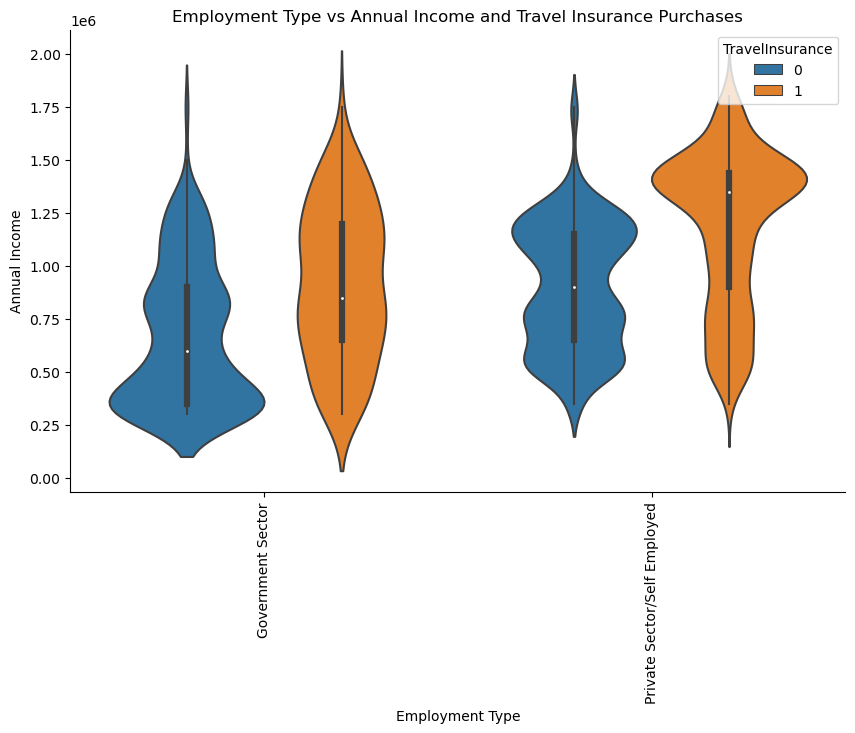

In [23]:
create_plot(travel_insurance_df, 'Employment Type', 'AnnualIncome', 'violin', 'Employment Type vs Annual Income and Travel Insurance Purchases', 'Employment Type', 'Annual Income', 'TravelInsurance')

- Income Distribution by Employment Type: The violin plots show the distribution of annual incomes for both government sector and private sector/self-employed individuals. Each employment type has a distinct income distribution, with the private sector showing a wider range, suggesting greater variance in incomes.

- Travel Insurance Purchase Patterns: Within each employment type, the color differentiation (assuming orange represents purchased and blue represents not purchased) provides insight into the likelihood of purchasing travel insurance at different income levels. For instance, if the orange area (indicating purchases) is broader or more pronounced at higher income levels, it suggests that individuals with higher incomes are more likely to purchase travel insurance, regardless of their employment type.

- Comparison Between Sectors: By comparing the two violin plots, we can gauge if one employment sector shows a higher propensity towards purchasing travel insurance at similar income levels. If the orange portion is larger or extends further in one plot, it might indicate a higher likelihood of insurance purchases within that employment type.

### How does the combination of graduate status, employment type, and age influence travel insurance decisions?

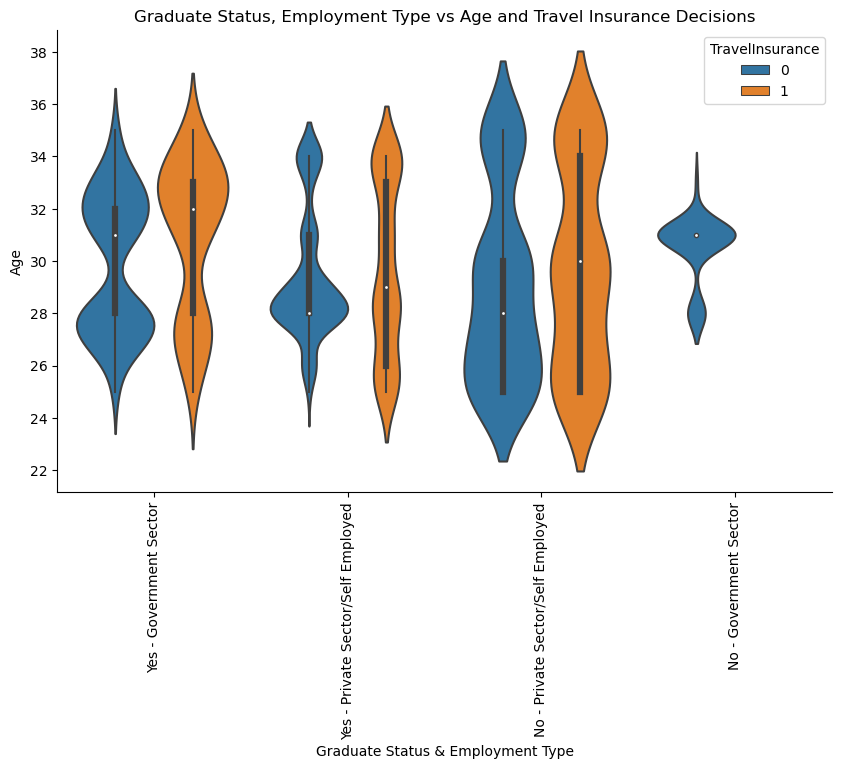

In [24]:
travel_insurance_df['Grad_Employment'] = travel_insurance_df['GraduateOrNot'] + " - " + travel_insurance_df['Employment Type']

create_plot(travel_insurance_df, 'Grad_Employment', 'Age', 'violin', 'Graduate Status, Employment Type vs Age and Travel Insurance Decisions', 'Graduate Status & Employment Type', 'Age', 'TravelInsurance')

- Age Distribution Across Groups: The violin plots reveal the age distribution for combinations of graduate status and employment type. Each group shows a different age profile, which helps us understand the demographic makeup of each segment.

- Insurance Purchase Trends: The color differentiation within each violin plot (assuming orange indicates purchases) highlights how the likelihood of purchasing travel insurance varies across age groups within each graduate-employment category. If certain age ranges within a group show a more pronounced orange area, it suggests that individuals in these age brackets are more inclined to purchase travel insurance.

- Graduate vs Non-Graduate Comparison: Comparing the plots for graduates and non-graduates within the same employment type can reveal whether educational attainment influences insurance purchasing decisions. A noticeable difference in the orange areas between graduates and non-graduates could indicate the impact of education on these decisions.

### Is there a relationship between age, having chronic diseases, and annual income in the context of purchasing travel insurance?

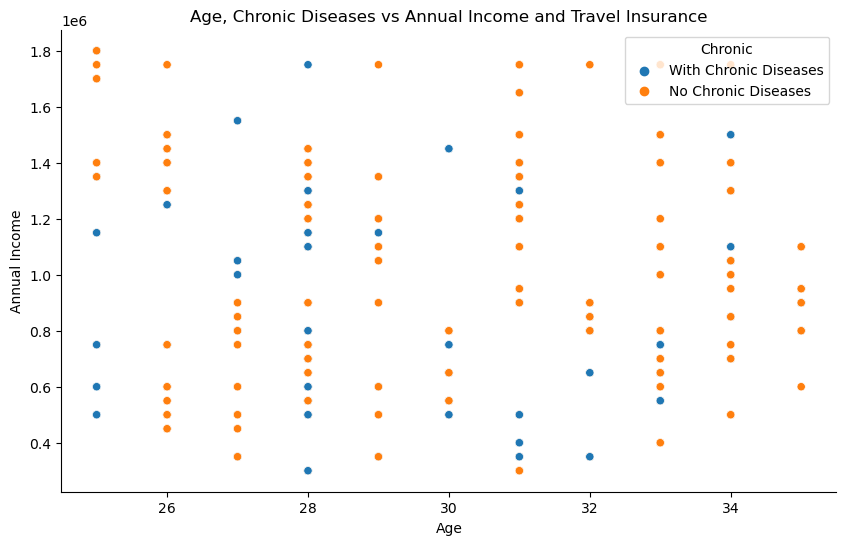

In [25]:
travel_insurance_df['Chronic'] = travel_insurance_df['ChronicDiseases'].apply(lambda x: 'With Chronic Diseases' if x == 1 else 'No Chronic Diseases')

create_plot(travel_insurance_df, 'Age', 'AnnualIncome', 'scatter', 'Age, Chronic Diseases vs Annual Income and Travel Insurance', 'Age', 'Annual Income', 'Chronic')

- Impact of Chronic Diseases: The scatter plot uses different markers to represent individuals with and without chronic diseases. If we notice that one type of marker (e.g., those representing individuals with chronic diseases) is more prevalent in areas with a higher concentration of orange points (indicating insurance purchases), it suggests that individuals with chronic diseases might be more inclined to purchase travel insurance.

- Income Levels and Insurance Purchases: By examining the distribution of orange points across various income levels, we can determine if there's a correlation between annual income and the likelihood of purchasing travel insurance. A higher density of orange points at certain income levels would indicate a higher propensity to purchase insurance among individuals within that income bracket.

- Age Consideration: The age distribution of orange points can help us understand if certain age groups are more likely to purchase travel insurance. For instance, if there's a notable cluster of orange points within a specific age range, it suggests that individuals within this age bracket, especially those with chronic diseases, might prioritize purchasing travel insurance.

# Correlation

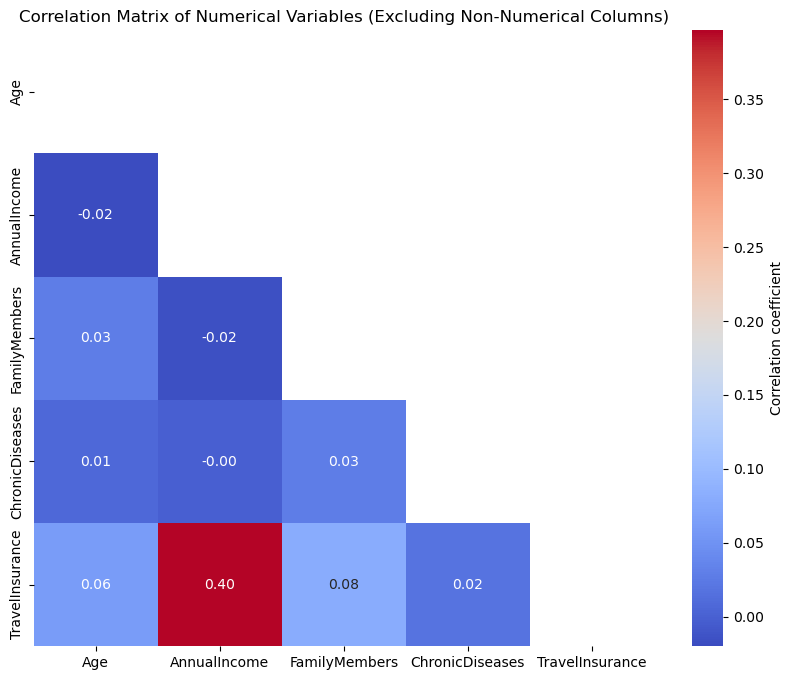

In [31]:
numerical_data = travel_insurance_df.select_dtypes(include=[np.number])

corr_matrix_numerical = numerical_data.corr()

mask_numerical = np.triu(np.ones_like(corr_matrix_numerical, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix_numerical, annot=True, fmt=".2f", mask=mask_numerical, cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Matrix of Numerical Variables (Excluding Non-Numerical Columns)')
plt.show()

- Age and Travel Insurance: The correlation between age and the likelihood of purchasing travel insurance is relatively low, suggesting that age alone might not be a strong predictor of travel insurance purchasing behavior.

- Annual Income and Travel Insurance: There is a positive correlation between annual income and the purchase of travel insurance, indicating that individuals with higher incomes are more likely to purchase travel insurance. This correlation is more substantial than that with age, suggesting that financial capability plays a more significant role in the decision to buy travel insurance.

- Family Members and Travel Insurance: The correlation between the number of family members and travel insurance purchases is very low, implying that the size of an individual's family does not significantly influence their decision to purchase travel insurance.
Chronic Diseases and Travel Insurance: The correlation between having chronic diseases and purchasing travel insurance is also quite low, indicating that the presence of chronic diseases may not be a major factor in the decision-making process for purchasing travel insurance.

# Statistical Inference

## Hypothesis 1: 

Individuals with higher annual incomes are more likely to purchase travel insurance than those with lower annual incomes, regardless of age.

- Null Hypothesis (H0): There is no difference in the likelihood of purchasing travel insurance between high and low-income individuals.
- Alternative Hypothesis (H1): High-income individuals are more likely to purchase travel insurance than low-income individuals.

In [32]:
median_income = travel_insurance_df['AnnualIncome'].median()
high_income_group = travel_insurance_df[travel_insurance_df['AnnualIncome'] > median_income]['TravelInsurance']
low_income_group = travel_insurance_df[travel_insurance_df['AnnualIncome'] <= median_income]['TravelInsurance']

confidence_level = 0.95
high_income_ci = stats.t.interval(confidence_level, len(high_income_group)-1, loc=np.mean(high_income_group), scale=stats.sem(high_income_group))
low_income_ci = stats.t.interval(confidence_level, len(low_income_group)-1, loc=np.mean(low_income_group), scale=stats.sem(low_income_group))

alpha = 0.05

t_stat, p_value = stats.ttest_ind(high_income_group, low_income_group, equal_var=False)

high_income_ci, low_income_ci, t_stat, p_value

((0.46645428487681934, 0.5294304887857321),
 (0.1970226684659744, 0.24829752857836054),
 13.303862125167326,
 1.1379991858274683e-38)

In [35]:
print(f"The Confidence Interval for the mean purchase rate of the high income group is equal to {high_income_ci}")
print(f"The Confidence Interval for the mean purchase rate of the low income group is equal to {low_income_ci}")

print(f"The T-stastic is equal to {t_stat}")
print(f"The P-value is equal to {p_value}")

The Confidence Interval for the mean purchase rate of the high income group is equal to (0.46645428487681934, 0.5294304887857321)
The Confidence Interval for the mean purchase rate of the low income group is equal to (0.1970226684659744, 0.24829752857836054)
The T-stastic is equal to 13.303862125167326
The P-value is equal to 1.1379991858274683e-38


### Hypothesis 1 Analysis:

> Confidence Intervals:

- High-Income Group: The confidence interval for the mean travel insurance purchase rate is approximately (0.47, 0.53). This suggests we are 95% confident that the true mean purchase rate for high-income individuals lies within this range.
- Low-Income Group: The confidence interval for the mean travel insurance purchase rate is approximately (0.20, 0.25). This suggests we are 95% confident that the true mean purchase rate for low-income individuals lies within this range.

> T-test Results:

- T-statistic: The calculated t-statistic is approximately 13.30, indicating a significant difference between the two groups.
- P-value: The p-value is approximately 1.14×10^−38, which is much lower than our significance level of 0.05.

> Conclusion:

- Given the very low p-value, we reject the null hypothesis (H0) that there is no difference in the likelihood of purchasing travel insurance between high and low-income individuals. The data provides strong evidence to support the alternative hypothesis (H1) that high-income individuals are more likely to purchase travel insurance than low-income individuals, regardless of age.

## Hypothesis 2: 

Frequent flyers are more likely to purchase travel insurance than non-frequent flyers, particularly if they have traveled abroad before.

- Null Hypothesis (H0): Frequent flyer status and having traveled abroad before do not influence the decision to purchase travel insurance.
- Alternative Hypothesis (H1): Frequent flyers, especially those who have traveled abroad before, are more likely to purchase travel insurance.

In [33]:
frequent_flyers_abroad = travel_insurance_df[(travel_insurance_df['FrequentFlyer'] == 'Yes') & (travel_insurance_df['EverTravelledAbroad'] == 'Yes')]['TravelInsurance']
non_frequent_flyers = travel_insurance_df[(travel_insurance_df['FrequentFlyer'] == 'No')]['TravelInsurance']

ff_abroad_ci = stats.t.interval(confidence_level, len(frequent_flyers_abroad)-1, loc=np.mean(frequent_flyers_abroad), scale=stats.sem(frequent_flyers_abroad))
non_ff_ci = stats.t.interval(confidence_level, len(non_frequent_flyers)-1, loc=np.mean(non_frequent_flyers), scale=stats.sem(non_frequent_flyers))

t_stat_ff, p_value_ff = stats.ttest_ind(frequent_flyers_abroad, non_frequent_flyers, equal_var=False)

ff_abroad_ci, non_ff_ci, t_stat_ff, p_value_ff

((0.831477461593508, 0.9304273003112539),
 (0.2773075484561563, 0.3226924515438437),
 21.047909012725448,
 8.01184093950571e-57)

In [36]:
print(f"The Confidence Interval for the mean purchase rate of the frequent flyer group is equal to {ff_abroad_ci}")
print(f"The Confidence Interval for the mean purchase rate of the non frequent flyer group is equal to {non_ff_ci}")

print(f"The T-stastic is equal to {t_stat_ff}")
print(f"The P-value is equal to {p_value_ff}")

The Confidence Interval for the mean purchase rate of the frequent flyer group is equal to (0.831477461593508, 0.9304273003112539)
The Confidence Interval for the mean purchase rate of the non frequent flyer group is equal to (0.2773075484561563, 0.3226924515438437)
The T-stastic is equal to 21.047909012725448
The P-value is equal to 8.01184093950571e-57


### Hypothesis 2 Analysis:

> Confidence Intervals:

- Frequent Flyers Who Have Traveled Abroad: The confidence interval for the mean travel insurance purchase rate is approximately (0.83, 0.93). This suggests we are 95% confident that the true mean purchase rate for this group lies within this range.
- Non-Frequent Flyers: The confidence interval for the mean travel insurance purchase rate is approximately (0.28, 0.32). This suggests we are 95% confident that the true mean purchase rate for non-frequent flyers lies within this range.

> T-test Results:

- T-statistic: The calculated t-statistic is approximately 21.05, indicating a significant difference between the two groups.
- P-value: The p-value is approximately 8.01 × 10^−57 , which is significantly lower than our significance level of 0.05.

> Conclusion:

- Given the extremely low p-value, we reject the null hypothesis (H0) that there is no difference in the likelihood of purchasing travel insurance between frequent flyers who have traveled abroad and non-frequent flyers. The data strongly supports the alternative hypothesis (H1) that frequent flyers who have traveled abroad are more likely to purchase travel insurance than non-frequent flyers.

# Travel Insurance Prediction

## Preprocessing Data: 

Convert categorical variables into numerical format using encoding techniques and split the dataset into training and testing sets.

In [38]:
X = travel_insurance_df.drop('TravelInsurance', axis=1)
y = travel_insurance_df['TravelInsurance']

numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_cols),
    ('cat', categorical_transformer, categorical_cols)])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1589, 11), (398, 11), (1589,), (398,))

In [41]:
print(f"The size of the X training set has this many rows and columns: {X_train.shape}")
print(f"The size of the X testing set has this many rows and columns: {X_test.shape}")
print(f"The size of the Y training set has this many rows and columns: {y_train.shape}")
print(f"The size of the Y testing set has this many rows and columns: {y_test.shape}")

The size of the X training set has this many rows and columns: (1589, 11)
The size of the X testing set has this many rows and columns: (398, 11)
The size of the Y training set has this many rows and columns: (1589,)
The size of the Y testing set has this many rows and columns: (398,)


> The data has been successfully preprocessed and split into training and testing sets, with 1589 samples in the training set and 398 samples in the test set. Each sample has 8 features after excluding the target variable TravelInsurance.

## Model Selection & Hyperparameter Tuning: 

We'll start with a Logistic Regression model as a baseline, followed by more complex models like Random Forest and Gradient Boosting. For each model, we'll perform hyperparameter tuning using Grid Search to optimize each model's performance. 

In [49]:
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=42))])

lr_param_grid = {
    'classifier__C': np.logspace(-4, 4, 20),
    'classifier__solver': ['liblinear', 'lbfgs']
}

lr_grid_search = GridSearchCV(lr_pipeline, lr_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid_search.fit(X_train, y_train)

lr_best_params = lr_grid_search.best_params_
lr_best_score = lr_grid_search.best_score_

lr_best_params, lr_best_score

({'classifier__C': 0.004832930238571752, 'classifier__solver': 'liblinear'},
 0.7822570085113981)

In [53]:
print("Logistic Regression Best Parameters:", lr_best_params)
print("Logistic Regression Best Score:", lr_best_score)

Logistic Regression Best Parameters: {'classifier__C': 0.004832930238571752, 'classifier__solver': 'liblinear'}
Logistic Regression Best Score: 0.7822570085113981


In [47]:
rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=42))])
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)

rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_


rf_best_params, rf_best_score

({'classifier__max_depth': None,
  'classifier__min_samples_leaf': 4,
  'classifier__min_samples_split': 10,
  'classifier__n_estimators': 100},
 0.8288395532011984)

In [51]:
print("Random Forest Best Parameters:", rf_best_params)
print("Random Forest Best Score:", rf_best_score)

Random Forest Best Parameters: {'classifier__max_depth': None, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Random Forest Best Score: 0.8288395532011984


In [48]:
gb_param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 5, 7]
}

gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', GradientBoostingClassifier(random_state=42))])
gb_grid_search = GridSearchCV(gb_pipeline, gb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
gb_grid_search.fit(X_train, y_train)

gb_best_params = gb_grid_search.best_params_
gb_best_score = gb_grid_search.best_score_

gb_best_params, gb_best_score

({'classifier__learning_rate': 0.01,
  'classifier__max_depth': 3,
  'classifier__n_estimators': 100},
 0.831980239271472)

In [50]:
print("Gradient Boosting Best Parameters:", gb_best_params)
print("Gradient Boosting Best Score:", gb_best_score)

Gradient Boosting Best Parameters: {'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 100}
Gradient Boosting Best Score: 0.831980239271472


### Analysis of Best Parameters and Scores

> Logistic Regression

- Best Parameters: The best C value is 0.004832930238571752, indicating strong regularization, which helps prevent overfitting by penalizing large coefficients. The solver chosen is 'liblinear', which is well-suited for small datasets and binary classification problems.
- Best Score: The best cross-validation accuracy score is approximately 78.23%. This score indicates that the Logistic Regression model, with the best hyperparameters, correctly predicts whether an individual will purchase travel insurance about 78% of the time in the cross-validation sets.

> Random Forest

- Best Parameters:
    - max_depth: None, allowing trees to expand until all leaves contain less than min_samples_split samples or until all leaves are pure.
    - min_samples_leaf: 4, requiring at least four samples to be at a leaf node, which helps control overfitting by making the trees less complex.
    - min_samples_split: 10, meaning a node will be split if it contains at least 10 samples, providing a balance between bias and variance.
    - n_estimators: 100, indicating the forest consists of 100 trees, offering a good trade-off between model complexity and computation time.
- Best Score: The best score is approximately 82.88%, showing a noticeable improvement over Logistic Regression, reflecting Random Forest's capability to handle complex relationships through multiple decision trees.

> Gradient Boosting

- Best Parameters:
    - learning_rate: 0.01, which specifies a slow learning process. This means each tree's contribution is small, allowing more room for future trees to - improve the model.
    - max_depth: 3, ensuring the individual trees are not too deep, which helps in controlling overfitting.
    - n_estimators: 100, indicating the model uses 100 sequential trees to correct the errors of the predecessors.
- Best Score: The best score is approximately 83.20%, slightly better than Random Forest. This highlights Gradient Boosting's effectiveness in sequentially correcting errors of previous trees and fitting complex datasets well.

> Insights Gained

- Model Complexity vs. Performance: Both Random Forest and Gradient Boosting outperform Logistic Regression, indicating the dataset likely has complex, non-linear relationships that tree-based models can capture more effectively.

- Regularization in Logistic Regression: The strong regularization suggests that preventing overfitting is crucial for achieving good performance, possibly due to a high-dimensional feature space after preprocessing categorical variables.

- Balance in Random Forest: The min_samples_leaf and min_samples_split parameters in Random Forest suggest a need to balance model complexity and overfitting carefully to achieve optimal performance.

- Slow Learning in Gradient Boosting: The choice of a low learning rate in Gradient Boosting, combined with a moderate number of trees, underscores the model's ability to gradually improve and adapt to the training data without overfitting.

## Evaluation: 

Analyze the models' performance using metrics like accuracy, precision, and the ROC-AUC score.

In [54]:
lr_best_model = LogisticRegression(C=0.004832930238571752, solver='liblinear', random_state=42)
rf_best_model = RandomForestClassifier(max_depth=None, min_samples_leaf=4, min_samples_split=10, n_estimators=100, random_state=42)
gb_best_model = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=100, random_state=42)

lr_pipeline = Pipeline([('preprocessor', preprocessor), ('classifier', lr_best_model)])
rf_pipeline = Pipeline([('preprocessor', preprocessor), ('classifier', rf_best_model)])
gb_pipeline = Pipeline([('preprocessor', preprocessor), ('classifier', gb_best_model)])

lr_pipeline.fit(X_train, y_train)
rf_pipeline.fit(X_train, y_train)
gb_pipeline.fit(X_train, y_train)

for model, name in zip([lr_pipeline, rf_pipeline, gb_pipeline], ['Logistic Regression', 'Random Forest', 'Gradient Boosting']):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    auc = roc_auc_score(y_test, predictions)
    print(f"{name} - Accuracy: {accuracy:.4f}, AUC: {auc:.4f}")

Logistic Regression - Accuracy: 0.7789, AUC: 0.7136
Random Forest - Accuracy: 0.8266, AUC: 0.7633
Gradient Boosting - Accuracy: 0.8442, AUC: 0.7817


### Analysis of evaluation metrics

> Logistic Regression:

- Best Parameters: Regularization strength (C) of 0.004832930238571752 and solver liblinear indicate that a stronger regularization was helpful, probably to prevent overfitting, and liblinear is suitable for small datasets and binary classification.
- Best Cross-Validation Score: 78.23% suggests the model's average performance across different subsets of the training data was fairly good.
- Test Set Performance: Accuracy of 77.89% and AUC of 0.7136 on the test set are close to the cross-validation score, indicating the model generalizes well to unseen data. However, the model's ability to distinguish between the classes (as indicated by AUC) is decent but not excellent.

> Random Forest:

- Best Parameters: The lack of a maximum depth (max_depth: None) suggests the model benefited from deeper trees, while min_samples_leaf: 4 and - min_samples_split: 10 helped prevent overfitting by ensuring that the leaf nodes have a minimum number of samples and that a split requires a minimum number of samples. n_estimators: 100 indicates the number of trees in the forest.
- Best Cross-Validation Score: 82.88% indicates a strong performance on the training data, with the model able to capture complex patterns without overfitting.
- Test Set Performance: With an accuracy of 82.66% and AUC of 0.7633, the Random Forest model performed well on the test set, showing good generalization and a better ability to distinguish between the classes compared to Logistic Regression.

> Gradient Boosting:

- Best Parameters: A learning_rate of 0.01 with max_depth: 3 and n_estimators: 100 indicates a more conservative approach to learning, which helps in building a robust model by gradually improving it with each additional tree.
- Best Cross-Validation Score: 83.20% is the highest among the three models, suggesting an excellent fit to the training data.
- Test Set Performance: The highest accuracy (84.42%) and AUC (0.7817) among the three models indicate that Gradient Boosting is the most effective at predicting the outcomes and distinguishing between the classes on this dataset.

# Improvement Suggestions

1. Feature Engineering:

- Create New Features: Create new features that could better capture the underlying patterns. 
- Feature Selection: Identify and retain only the most relevant features, reducing noise and potential overfitting.

2. Advanced Models and Techniques:

- Experiment with Advanced Models: Try and play around with advanced ensemble methods like XGBoost, LightGBM, or CatBoost.
- Deep Learning: Explore deep learning models that could be beneficial, especially neural networks that can capture complex non-linear relationships.